In [1]:
# Importing modules
import pandas as pd
import os
os.chdir('..')

# Read data into papers
papers = pd.read_csv('C:/Users/serva/Downloads/papers.csv.zip')

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [2]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
6987,1993,Neural Network Exploration Using Optimal Exper...,Abstract Missing,Neural Network Exploration Using\nOptimal Expe...
268,1996,A Neural Model of Visual Contour Integration,Abstract Missing,A neural model of visual contour\nintegration\...
5785,2016,Confusions over Time: An Interpretable Bayesia...,"We propose Confusions over Time (CoT), a novel...",Confusions over Time: An Interpretable Bayesia...
2656,2008,Adaptive Template Matching with Shift-Invarian...,How does one extract unknown but stereotypical...,Adaptive Template Matching with\nShift-Invaria...
1227,2001,Cobot: A Social Reinforcement Learning Agent,Abstract Missing,Cobot: A Social Reinforcement Learning Agent\n...


In [3]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
papers['paper_text_processed'].head()

6987    neural network exploration using\noptimal expe...
268     a neural model of visual contour\nintegration\...
5785    confusions over time: an interpretable bayesia...
2656    adaptive template matching with\nshift-invaria...
1227    cobot: a social reinforcement learning agent\n...
Name: paper_text_processed, dtype: object

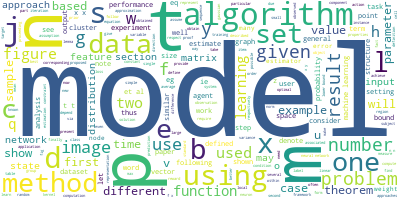

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serva\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['neural', 'network', 'exploration', 'using', 'optimal', 'experiment', 'design', 'david', 'cohn', 'dept', 'brain', 'cognitive', 'sciences', 'massachusetts', 'inst', 'technology', 'cambridge', 'abstract', 'consider', 'problem', 'learning', 'input', 'output', 'mappings', 'exploration', 'eg', 'learning', 'kinematics', 'dynamics', 'robotic']


In [12]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 7), (8, 5), (9, 3), (10, 1), (11, 10), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 4), (23, 2), (24, 1), (25, 2), (26, 2), (27, 1), (28, 2), (29, 1)]


In [13]:
from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"model" + 0.005*"time" + 0.005*"matrix" + 0.004*"learning" + '
  '0.004*"set" + 0.004*"data" + 0.004*"models" + 0.003*"algorithm" + '
  '0.003*"using" + 0.003*"figure"'),
 (1,
  '0.005*"model" + 0.005*"algorithm" + 0.005*"learning" + 0.004*"function" + '
  '0.004*"set" + 0.004*"data" + 0.003*"using" + 0.003*"two" + 0.003*"log" + '
  '0.003*"time"'),
 (2,
  '0.005*"learning" + 0.005*"data" + 0.004*"model" + 0.004*"algorithm" + '
  '0.004*"one" + 0.003*"set" + 0.003*"time" + 0.003*"using" + 0.003*"image" + '
  '0.003*"also"'),
 (3,
  '0.007*"data" + 0.006*"learning" + 0.004*"model" + 0.004*"set" + '
  '0.004*"algorithm" + 0.003*"function" + 0.003*"network" + 0.003*"time" + '
  '0.003*"using" + 0.003*"also"'),
 (4,
  '0.005*"model" + 0.004*"data" + 0.004*"learning" + 0.004*"algorithm" + '
  '0.004*"image" + 0.004*"one" + 0.003*"function" + 0.003*"matrix" + '
  '0.003*"set" + 0.003*"using"'),
 (5,
  '0.007*"learning" + 0.006*"data" + 0.005*"model" + 0.004*"using" + '
  '0.004

In [21]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(''+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, ''+ str(num_topics) +'.html')
    
LDAvis_prepared

C:\Users\serva\Downloads\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.007070  0.002762       1        1  14.768123
3      0.006873  0.008091       2        1  12.360493
5      0.001440  0.005742       3        1  11.568923
8      0.007293 -0.006196       4        1  10.609909
0     -0.008838  0.000943       5        1  10.218051
1     -0.000895 -0.006072       6        1  10.131247
4      0.003478  0.000496       7        1   9.513062
2     -0.001978 -0.003426       8        1   7.995318
7     -0.001219  0.001224       9        1   7.089428
6      0.000915 -0.003564      10        1   5.745446, topic_info=           Term         Freq        Total Category  logprob  loglift
22    algorithm   997.000000   997.000000  Default  30.0000  30.0000
1702     matrix   724.000000   724.000000  Default  29.0000  29.0000
428       model  1228.000000  1228.000000  Default  28.0000  28.0000
962       image   582.000000   582.000000  Default  27.0000  27.0000
157        data  1366.000000  1366.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
654         two    35.235588   674.296039  Topic10  -5.9870  -0.0949
256       first    29.753179   501.667141  Topic10  -6.1561   0.0318
338       input    27.259609   426.186208  Topic10  -6.2437   0.1073
633        time    29.159009   744.477423  Topic10  -6.1763  -0.3832
429      models    26.713179   560.042498  Topic10  -6.2639  -0.1861

[845 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
6772       1  0.084428  accumulation
6772       2  0.084428  accumulation
6772       3  0.168856  accumulation
6772       4  0.084428  accumulation
6772       5  0.084428  accumulation
...      ...       ...           ...
13232      6  0.105038           zti
13232      7  0.052519           zti
13232      8  0.105038           zti
13232      9  0.131298           zti
13232     10  0.026260           zti

[4050 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 6, 9, 1, 2, 5, 3, 8, 7])

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(''+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, ''+ str(num_topics) +'.html')
    
LDAvis_prepared
